## Demonstrate your skills for data clustering and dimensionality reduction. 

### Part-1 (Clustering):
Download BBC sports dataset from the Cloud. This dataset consists of 737 documents from the BBC Sport website corresponding to sports news articles in five topical areas from 2004-2005. There are 5 class labels: athletics, cricket, football, rugby, tennis. The original dataset and raw text files can be downloaded from [here](http://mlg.ucd.ie/datasets/bbc.html)

1- There are 3 files in the dataset corresponding to the feature matrix, the class labels and the term dictionary. You need to read these files in Python notebook and store in variables X, trueLabels, and terms.

2- Next perform K-means clustering with 5 clusters using **Euclidean distance** as similarity measure. Evaluate the clustering performance using adjusted rand index and adjusted mutual information. Report the clustering performance averaged over 50 random initializations of K-means. 

3- Repeat K-means clustering with 5 clusters using **Cosine distance** as similarity measure. Evaluate the clustering performance using adjusted rand index and adjusted mutual information. Report the clustering performance averaged over 50 random initializations of K-means.  

4- For both clustering cases (Euclidean distance and Cosine distance), visualize the cluster centres using Tag cloud using Python package WordCloud. 



### Part-2 (Dimensionality Reduction using PCA/SVD):
For the provided BBC sports dataset, perform PCA and plot the captured variance with respect to increasing latent dimensionality. What is the minimum dimension that captures (a) at least 95% variance and (b) at least 98% variance? 


# Part-1 Solutions

## Importing Libraries

In [1]:
#Here we are going to import the libraries

import numpy as num                            #It is used for arrays, calculations and matrices 
import pandas as pd                            #It is used for reading and writing the csv files
import matplotlib.pyplot as plt                #It is used for plotting graphs and charts
from sklearn.cluster import KMeans             #It is used for the implementation of K means
from sklearn import cluster                    #It is used for clustering
from sklearn import metrics                    #It is used for measuring the quality of our clusters
from sklearn import preprocessing              #It is used for normalizing te data
from wordcloud import WordCloud, STOPWORDS     #It is used for creating a word cloud
%matplotlib inline

## 1. Reading Files

Here we are reading the bbcsport_mtx.csv, bbcsport_classes.csv and bbcsport_terms.csv files in variables X, trueLabels and terms respectively.

In [2]:
X = pd.read_csv('bbcsport_mtx.csv',delimiter=',',header=None).values                 #Reding Feature Matrix File
trueLabels = pd.read_csv('bbcsport_classes.csv',delimiter=',',header=None).values    #Reading True Labels File
terms = pd.read_csv('bbcsport_terms.csv',delimiter=',',header=None).values           #Reading Terms File

labelsTrue=num.array(trueLabels.T)[0]


## 2. K-Means using Euclidean Distance

In the below code, we are going to execute the code for k-means using euclidean distance. We are running the algorithm for 50 random initializations and for each initalization we are getting the cluster centers and predicted labels. To evaluate the performace over 50 random initiaization, we are storing the adjusted random index and adjusted mutual information value for each run and also storing the index for the best performance ari and ami.

In [5]:
i=0                         #Created for running K-means 50 times
rand_ari = range(1,51)      #Created for storing ari values for each iteration 
rand_ami = range(1,51)      #Created for storing ami values for each iteration
min_ari = 0                 #To store the minimum value of ari
max_ari = 0                 #To store the maximum value of ari
labels_index = range(1,51)  #To store the labels for the maximum value of ari
index = 0                   
index_value = 0
while i<50:
    #Applying k-means clustering using euclidean distance 
    kmeans = cluster.KMeans(init='random', n_clusters=5, n_init=1).fit(X)

    #Storing cluster centers in a variable
    centroid=kmeans.cluster_centers_

    #Storing the labels in a variable
    predicted_labels = kmeans.labels_

    #Calculating the ari value for the current iteration
    ari = metrics.adjusted_rand_score(labelsTrue, predicted_labels)
    
    #If loop is for setting up the maximum ari value
    if ari > min_ari:
        max_ari = ari
        index_value = i
        min_ari = max_ari
        labels_index[index_value]=predicted_labels
    
    index = index_value
    
    #Storing the current ari value in the array
    rand_ari[i] = ari
    
    #Calculating the ami value for the current iteration and storing it in the array
    ami = metrics.adjusted_mutual_info_score(labelsTrue, predicted_labels)
    rand_ami[i] = ami
    i+=1

## ARI and AMI for Euclidean

Here we are calculating the adjusted rand index value by taking the mean of the values and computing the performance. We are taking the mean value of the stored ari so as to compute the average performance over 50 random initializations.

In [6]:
print "Adjusted Rand Index: {}".format(num.mean(rand_ari,axis=0))                  #Calculating the average performance
print "Adjusted Mutual Information Score: {}".format(num.mean(rand_ami,axis=0))    #Calculating the average value

Adjusted Rand Index: 0.0801743349697
Adjusted Mutual Information Score: 0.158159331861


## 3. K-Means using Cosine Distance

In the below code, we are going to execute the code for k-means using cosine distance. We are normalizing the data that is feature matrix stored in the variable X, using l2 normalization and then apllying regular k-means. We are running the algorithm for 50 random initializations and for each initalization we are getting the cluster centers and predicted labels. To evaluate the performace over 50 random initiaization, we are storing the adjusted random index and adjusted mutual information value for each run and also storing the index for the best performance ari and ami.

In [7]:
X = num.array(X, dtype= num.float)                          #Converting the values to float
X_normalization = preprocessing.normalize(X, norm='l2')     #Normalizing the data using 'l2' technique

i=0                                 #Created for running K-means 50 times
rand_ari_cos = range(1,51)              #Created for storing ari values for each iteration 
rand_ami_cos = range(1,51)              #Created for storing ami values for each iteration
min_ari_cos = 0                         #To store the minimum value of ari
max_ari_cos = 0                         #To store the maximum value of ari
labels_index_cos = range(1,51)      #To store the labels for the maximum value of ari
index_cos = 0
index_value_cos = 0

while i<50:
    #Applying k-means clustering using cosine distance 
    kmeans_cos = KMeans(init='random', n_clusters=5 , n_init=1).fit(X_normalization)

    #Storing cluster centers in a variable
    centroid_cos =  kmeans_cos.cluster_centers_

    #Storing the labels in a variable
    predicted_labels_cos = kmeans_cos.labels_

    #Calculating the ari value for the current iteration
    ari = metrics.adjusted_rand_score(labelsTrue, predicted_labels_cos)
    
    #If loop is for setting up the maximum ari value
    if ari > min_ari_cos:
        max_ari_cos = ari
        index_value_cos = i
        min_ari_cos = max_ari_cos
        labels_index_cos[index_value_cos]=predicted_labels
    
    index_cos = index_value_cos
    
    #Storing the current ari value in the array
    rand_ari_cos[i] = ari
    
    #Calculating the ami value for the current iteration and storing it in the array
    ami = metrics.adjusted_mutual_info_score(labelsTrue, predicted_labels_cos)
    rand_ami_cos[i] = ami
    i+=1

## ARI and AMI for Cosine

Here we are calculating the adjusted rand index value by taking the mean of the values and computing the performance. We are taking the mean value of the stored ari so as to compute the average performance over 50 random initializations.

In [8]:
print "Adjusted Rand Index: {}".format(num.mean(rand_ari_cos,axis=0))                 #Calculating the average performance
print "Adjusted Mutual Information Score: {}".format(num.mean(rand_ami_cos,axis=0))   #Calculating the average value

Adjusted Rand Index: 0.628635887087
Adjusted Mutual Information Score: 0.66627008217


## 4. Visualizing the Cluster Centers using Word Cloud
While we ran the K-means algorithm using euclidean and cosine, we stored the predicted labels for the index which had the best performace for the adjusted rand index. Using the stored label for that particular index, we are going to plot the word cloud. We have 737 documents, so we are running the loop till 737 and storing the index of the labels 0,1,2,3,4 in the respective list numbers. The below code runs for the <b>euclidean distance</b>.

In [9]:
def createEuclideanClusterList(labels_index,index):
    euc_index=0

    euclidean_labels = labels_index[index]                #Reading the labels which had the best performance for ari

    #Creating list for each labels
    cluster_list0=[]
    cluster_list1=[]
    cluster_list2=[]
    cluster_list3=[]
    cluster_list4=[]

    #Adding the index of labels in the respective lists
    while euc_index < 737:
        if euclidean_labels[euc_index]==0:
            cluster_list0.append(euc_index)
        elif euclidean_labels[euc_index]==1:
            cluster_list1.append(euc_index)
        elif euclidean_labels[euc_index]==2:
            cluster_list2.append(euc_index)
        elif euclidean_labels[euc_index]==3:
            cluster_list3.append(euc_index)
        elif euclidean_labels[euc_index]==4:
            cluster_list4.append(euc_index)
        euc_index = euc_index + 1
    return cluster_list0, cluster_list1, cluster_list2, cluster_list3, cluster_list4

In [10]:
cluster_list0,cluster_list1,cluster_list2,cluster_list3,cluster_list4 = createEuclideanClusterList(labels_index,index)

We have 737 documents, so we are running the loop till 737 and storing the index of the labels 0,1,2,3,4 in the respective list numbers. The below code runs for the <b>cosine distance</b>.

In [11]:
def createCosineClusterList(labels_index_cos,index):
    cosine_index=0

    cosine_labels = labels_index_cos[index]                   #Reading the table which had the best performance for ari

    #Creating list for each labels
    cosine_cluster_list0=[]
    cosine_cluster_list1=[]
    cosine_cluster_list2=[]
    cosine_cluster_list3=[]
    cosine_cluster_list4=[]

    #Adding the index of labels in the respective lists
    while cosine_index < 737:
        if cosine_labels[cosine_index]==0:
            cosine_cluster_list0.append(cosine_index)
        elif cosine_labels[cosine_index]==1:
            cosine_cluster_list1.append(cosine_index)
        elif cosine_labels[cosine_index]==2:
            cosine_cluster_list2.append(cosine_index)
        elif cosine_labels[cosine_index]==3:
            cosine_cluster_list3.append(cosine_index)
        elif cosine_labels[cosine_index]==4:
            cosine_cluster_list4.append(cosine_index)
        cosine_index = cosine_index + 1
    return cosine_cluster_list0, cosine_cluster_list1, cosine_cluster_list2, cosine_cluster_list3, cosine_cluster_list4

In [12]:
cosine_cluster_list0, cosine_cluster_list1, cosine_cluster_list2, cosine_cluster_list3, cosine_cluster_list4 = createCosineClusterList(labels_index_cos,index_cos)

### Creating Function
Here, we creating a function named calculateFreq in which we are passing the list for each label/cluster calculated in the above pieces of code. In the function, we are basically using the list by reading the index and passing that index to the feature matrix X to read the entire row. Then, we are going to do the matrix addition for the rows selected using the list passed and take a transpose of it.

In [13]:
def calculateFreq(clusterlist):                             #Ceating a function which accepts one parameter
    i=0
    loop= len(clusterlist)                                  #Reading the length of the passed list
    freq_matrix= num.zeros([1,4613], dtype=num.int)         #Creating a zero matrix of 1 row, 4613 column

    while i < loop:
        freq_matrix= freq_matrix + X[clusterlist[i]]        #Adding the matrix
        i +=1    
    #print temp
    freq_matrix_trans= freq_matrix.T                        #Taking a transpose
    
    return freq_matrix_trans

### Making Function Calls
Now, we are going to make a function call to the above function for each euclidean list created and get the frequency for each term in all the clusters.

In [14]:
#Making a function call for each list created for euclidean
euc_freq_cluster0 = calculateFreq(cluster_list0)

euc_freq_cluster1 = calculateFreq(cluster_list1)

euc_freq_cluster2 = calculateFreq(cluster_list2)

euc_freq_cluster3 = calculateFreq(cluster_list3)

euc_freq_cluster4 = calculateFreq(cluster_list4)


Now, we are going to make a function call to the above function for each cosine each created and get the <b>frequency</b> for each term in all the clusters.

In [15]:
#Making a function call for each list created for cosine
cosine_freq_cluster0 = calculateFreq(cosine_cluster_list0)

cosine_freq_cluster1 = calculateFreq(cosine_cluster_list1)

cosine_freq_cluster2 = calculateFreq(cosine_cluster_list2)

cosine_freq_cluster3 = calculateFreq(cosine_cluster_list3)

cosine_freq_cluster4 = calculateFreq(cosine_cluster_list4)


Now we are creating a function <b>createWordClusters</b> which will create the word string for each cluster. 

In [16]:
def createWordClusters(transpose_matrix):                   #Creating a function which will accept one parameter 
    i=0                                                     #For running the outer loop
    j=0                                                     #For running the inner loop till the frequency value of each word
    cluster_text = ""                                       #For storing the words   
    termtext = ""

    while i < len(transpose_matrix):
        j = transpose_matrix[i]                             #Reading the frequency of the word
        while j > 0:
            termtext = terms[i]                             #Reading the term value
            cluster_text = termtext + " " + cluster_text    #Adding the value to the cluster text
            j-=1
        i+=1

    return num.array2string(cluster_text) 

Now we will call the above function <b>createWordClusters</b> by passing the frequency matrix for each cluster created for euclidean.

In [17]:
#Making a function call for each frequency matrix created for euclidean
euc_cluster_text0 = createWordClusters(euc_freq_cluster0)

euc_cluster_text1 = createWordClusters(euc_freq_cluster1)

euc_cluster_text2= createWordClusters(euc_freq_cluster2)


euc_cluster_text3 = createWordClusters(euc_freq_cluster3)

euc_cluster_text4 = createWordClusters(euc_freq_cluster4)


Now we will call the above function <b>createWordClusters</b> by passing the frequency matrix for each cluster created for cosine.

In [18]:
#Making a function call for each frequency matrix created for cosine
cosine_cluster_text0 = createWordClusters(cosine_freq_cluster0)

cosine_cluster_text1 = createWordClusters(cosine_freq_cluster1)

cosine_cluster_text2= createWordClusters(cosine_freq_cluster2)

cosine_cluster_text3 = createWordClusters(cosine_freq_cluster3)

cosine_cluster_text4 = createWordClusters(cosine_freq_cluster4)


Now we will plot the word cloud using the below created function <b>createWordCloud.</b>

In [19]:
def createWordCloud(clusterwords):
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',collocations=False).generate_from_text(clusterwords)
    
    fig = plt.figure()
    plt.imshow(wordcloud)
    fig.show()
    plt.show()

### Creating Word Cloud for Each Euclidean Cluster
Here we are making a call to the above defined function createWordCloud by passing the cluster text for each clusters.

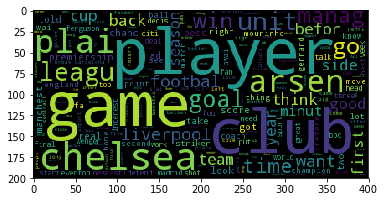

In [21]:
#Creating word cloud for cluster 0
createWordCloud(euc_cluster_text0)

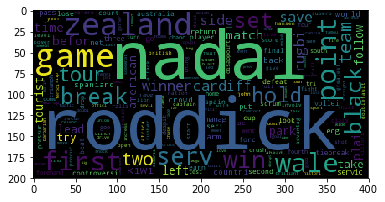

In [22]:
#Creating word cloud for cluster 1
createWordCloud(euc_cluster_text1)

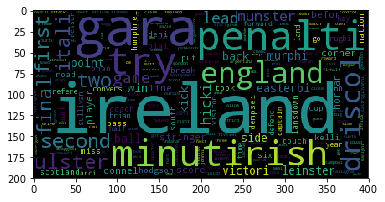

In [23]:
#Creating word cloud for cluster 2
createWordCloud(euc_cluster_text2)

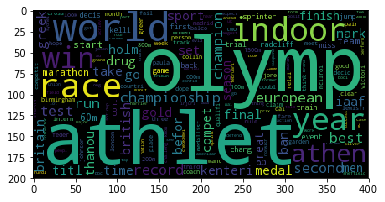

In [24]:
#Creating word cloud for cluster 3
createWordCloud(euc_cluster_text3)

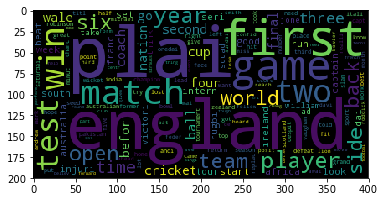

In [25]:
#Creating word cloud for cluster 4
createWordCloud(euc_cluster_text4)

### Creating Word Cloud for Each Cosine Cluster
Here we are making a call to the above defined function createWordCloud by passing the cluster text for each clusters.

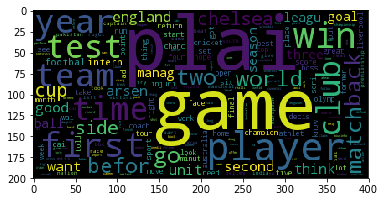

In [26]:
#Creating word cloud for cluster 0
createWordCloud(cosine_cluster_text0)

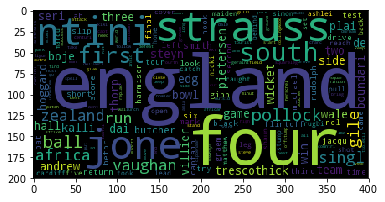

In [27]:
#Creating word cloud for cluster 1
createWordCloud(cosine_cluster_text1)

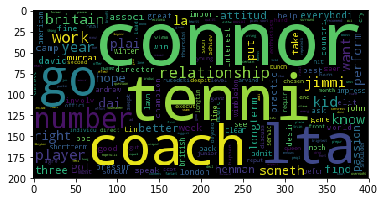

In [28]:
#Creating word cloud for cluster 2
createWordCloud(cosine_cluster_text2)

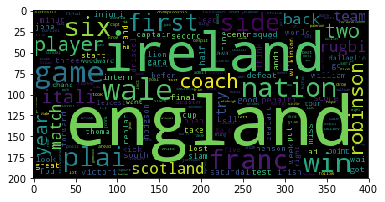

In [29]:
#Creating word cloud for cluster 3
createWordCloud(cosine_cluster_text3)

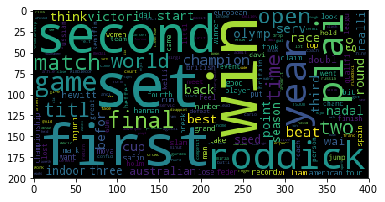

In [30]:
#Creating word cloud for cluster 4
createWordCloud(cosine_cluster_text4)




# Part-2 Solutions

## 1. Dimensionality Reduciton Using PCA
Here we are using PCA for the dimensionality reduction. First we normalize our data by using the scale function. Then we pass the number of principal components and fit our normalized data. Each variance is a vector and we see the amount of variance each principal components contains. We calculate the cumulative variance and can easily see how many components capture the required values and thus we can drop the other components.


[  1.51   2.8    3.96   4.97   5.93   6.8    7.65   8.47   9.24   9.97
  10.69  11.34  11.98  12.61  13.23  13.8   14.36  14.91  15.46  16.    16.52
  17.01  17.49  17.96  18.42  18.87  19.31  19.75  20.18  20.61  21.03
  21.44  21.84  22.24  22.63  23.02  23.41  23.79  24.17  24.55  24.92
  25.28  25.64  26.    26.35  26.7   27.04  27.38  27.72  28.06  28.4
  28.73  29.06  29.39  29.72  30.04  30.36  30.68  30.99  31.3   31.61
  31.92  32.23  32.54  32.84  33.14  33.44  33.74  34.04  34.34  34.63
  34.92  35.21  35.5   35.79  36.07  36.35  36.63  36.91  37.19  37.47
  37.74  38.01  38.28  38.55  38.82  39.08  39.34  39.6   39.86  40.12
  40.38  40.64  40.89  41.14  41.39  41.64  41.89  42.14  42.39  42.63
  42.87  43.11  43.35  43.59  43.83  44.07  44.31  44.55  44.78  45.01
  45.24  45.47  45.7   45.93  46.16  46.39  46.61  46.83  47.05  47.27
  47.49  47.71  47.93  48.15  48.36  48.57  48.78  48.99  49.2   49.41
  49.62  49.83  50.04  50.25  50.46  50.67  50.88  51.08  51.28  51.48


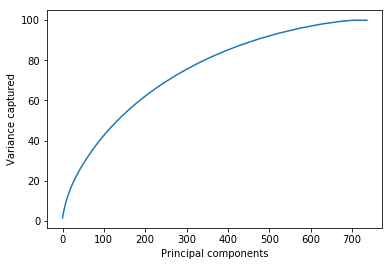

In [31]:
#Normalizing our data
from sklearn.preprocessing import scale
Xnorm = scale(X)

#Performing PCA using sklearn PCA implementation

from sklearn.decomposition import PCA
pca = PCA(n_components=4613)
pca.fit(Xnorm)

#Capturing amount of variance each prinicpal component contains
var= pca.explained_variance_ratio_

#Calculating Cumulative Variance
var1=num.cumsum(num.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1

#Plotting Graph
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
plt.show()

<b>Minimum dimension that captures</b>

(a) at least 95% variance 

554 dimensions capture atleast 95% variance

(b) at least 98% variance

624 dimensions capture atleast 98% variance